In [1]:
import sys
import torch
sys.path.append('./python')

/home/gensenju/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np
import needle as ndl
from needle import array_api, Tensor, NDArray
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
img = mpimg.imread("data/image.png")

In [4]:
model = ndl.nn.Diffusion(300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


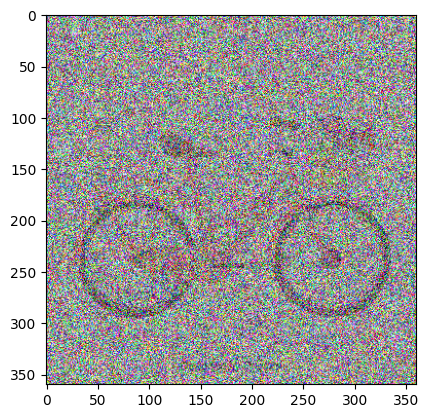

In [8]:
model_ans = model.q_sample(Tensor(img), Tensor([200]))
img_to_show = model_ans.numpy()
plt.imshow(img_to_show);

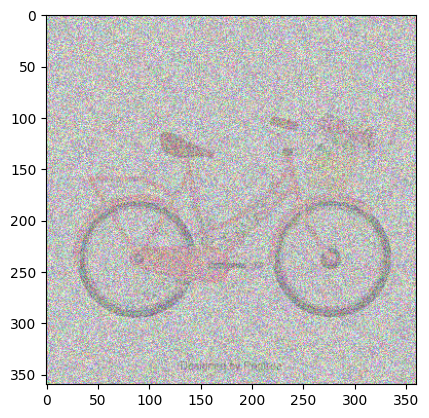

In [7]:
model_ans = model.get_q_sample(Tensor(img), 200)
img_to_show = model_ans.numpy()
plt.imshow(img_to_show);

In [10]:
Tensor([1, 2, 3]).cached_data[0]

NDArray([1.], device=cpu_numpy())

In [66]:
a = torch.Tensor(range(1, 10))
t = torch.randint(0, 5, (5,)).long()
shape = (3, 3)
print(a)
a.gather(-1, t), t

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])


(tensor([5., 3., 2., 5., 1.]), tensor([4, 2, 1, 4, 0]))

In [67]:
ndl.NDArray()

AttributeError: 'list' object has no attribute 'array'

In [22]:
def linear_beta_schedule(timesteps, start=0.0001, end=0.02):
    return array_api.linspace(start, end, timesteps)

In [35]:
def forward_diffusion_sample(x_0, t):
    shape = x_0.shape
    noise = ndl.init.randn(*shape).reshape(shape)
    
    sqrt_alphas_cumprod_t = sqrt_alphas_cumprod[t].broadcast_to(shape)
    sqrt_one_minus_alphas_cumprod_t = sqrt_one_minus_alphas_cumprod[t].broadcast_to(shape)
    
    return sqrt_alphas_cumprod_t * x_0 + ndl.NDArray(sqrt_one_minus_alphas_cumprod_t.numpy() * noise.numpy()), noise

In [36]:
T = 300
betas = linear_beta_schedule(timesteps=T)

# Pre-calculate different terms for closed form
alphas = 1. - betas
alphas_cumprod = array_api.cumprod(alphas, axis=0)
alphas_cumprod_prev = array_api.pad(alphas_cumprod[:-1], (1, 0))
alphas_cumprod_prev[0] = 1.0

sqrt_recip_alphas = (1.0 / alphas)**(1/2)
sqrt_alphas_cumprod = (alphas_cumprod)**(1/2)
sqrt_one_minus_alphas_cumprod = (1. - alphas_cumprod)**(1/2)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


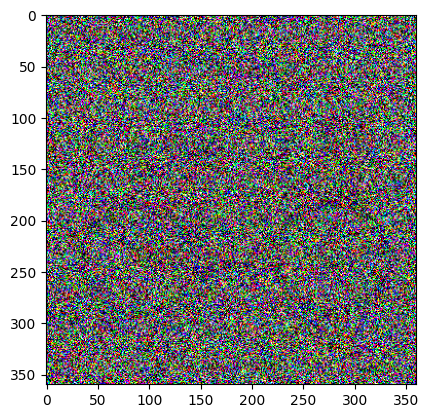

In [44]:
plt.imshow(forward_diffusion_sample(ndl.NDArray(img), 299)[0].numpy())